![image.png](attachment:image.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/'

In [4]:
import os 

In [5]:
directory = '/content/drive/MyDrive/fish'
train_files = []
target_files = []
fish_types = 'Black Sea Sprat'
for file in os.listdir(os.path.join(directory, fish_types)):
    train_files.append(os.path.join(directory, 'Black Sea Sprat', file))
    target_files.append(os.path.join(directory,  'Black Sea Sprat GT', file))

In [6]:
df = pd.DataFrame({'img' : train_files, 'mask' : target_files})
df.head()

,img,mask
0,/content/drive/MyDrive/fish/Black Sea Sprat/00...,/content/drive/MyDrive/fish/Black Sea Sprat GT...
1,/content/drive/MyDrive/fish/Black Sea Sprat/00...,/content/drive/MyDrive/fish/Black Sea Sprat GT...
2,/content/drive/MyDrive/fish/Black Sea Sprat/00...,/content/drive/MyDrive/fish/Black Sea Sprat GT...
3,/content/drive/MyDrive/fish/Black Sea Sprat/00...,/content/drive/MyDrive/fish/Black Sea Sprat GT...
4,/content/drive/MyDrive/fish/Black Sea Sprat/00...,/content/drive/MyDrive/fish/Black Sea Sprat GT...


In [7]:
df1 = pd.DataFrame()

In [8]:
from tqdm import tqdm

In [9]:
df = df[:]

In [10]:
(df['img'][0])

'/content/drive/MyDrive/fish/Black Sea Sprat/00001.png'

In [11]:
img = []
for ind in tqdm(range(len(df['img']))):
    origImage = cv2.imread(df['img'][ind])
    #origImage = cv2.cvtColor(origImage, cv2.COLOR_BGR2GRAY, )
    img.append(origImage)
df1['img'] = img

100%|██████████| 1000/1000 [11:59<00:00,  1.39it/s]


In [12]:
(df['mask'][0])

'/content/drive/MyDrive/fish/Black Sea Sprat GT/00001.png'

In [13]:
mask = []
for ind in tqdm(range(len(df['mask']))):
    origImage = cv2.imread(df['mask'][ind])
    #print(origImage)
    origImage = cv2.cvtColor(origImage, cv2.COLOR_BGR2GRAY, )
    origImage = (origImage ) 
    mask.append(origImage**2)
df1['mask'] = mask

100%|██████████| 1000/1000 [08:33<00:00,  1.95it/s]


In [14]:
mask[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
def keras_generator(gen_df, batch_size):
    while True:
        x_batch = []
        y_batch = []

        for i in range(batch_size):
            img, mask = gen_df.sample(1).values[0]
            
            img = cv2.resize(img, (256, 256))
            mask = cv2.resize(mask, (256, 256))
            mask =( mask > 0) **2
            
            x_batch += [img]
            y_batch += [mask]

        x_batch = np.array(x_batch) / 255.
        y_batch = np.array(y_batch)

        yield x_batch, np.expand_dims(y_batch, -1)

In [16]:
mask[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
df1.shape

(1000, 2)

In [18]:
df_train = df1[:800]
df_val = df1[800:]

In [19]:
for x, y in keras_generator(df_train, 16):
    break

In [20]:
x.shape

(16, 256, 256, 3)

In [21]:
y[0][150]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [22]:
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, Conv2D, MaxPooling2D, Activation
from keras.layers import Input, Dense
#Padding is a term for convolutional neural networks because it refers to the number of pixels added to an image when it is processed by the CNN core.
inp = Input(shape=(256, 256, 3))
conv_1_1 = Conv2D(32, (3, 3), padding='same')(inp)
conv_1_1 = Activation('relu')(conv_1_1)
conv_1_2 = Conv2D(32, (3, 3), padding='same')(conv_1_1)
conv_1_2 = Activation('relu')(conv_1_2)
pool_1 = MaxPooling2D(2)(conv_1_2)

conv_2_1 = Conv2D(64, (3, 3), padding='same')(pool_1)
conv_2_1 = Activation('relu')(conv_2_1)
conv_2_2 = Conv2D(64, (3, 3), padding='same')(conv_2_1)
conv_2_2 = Activation('relu')(conv_2_2)
pool_2 = MaxPooling2D(2)(conv_2_2)

conv_3_1 = Conv2D(128, (3, 3), padding='same')(pool_2)
conv_3_1 = Activation('relu')(conv_3_1)
conv_3_2 = Conv2D(128, (3, 3), padding='same')(conv_3_1)
conv_3_2 = Activation('relu')(conv_3_2)
pool_3 = MaxPooling2D(2)(conv_3_2)

conv_4_1 = Conv2D(256, (3, 3), padding='same')(pool_3)
conv_4_1 = Activation('relu')(conv_4_1)
conv_4_2 = Conv2D(256, (3, 3), padding='same')(conv_4_1)
conv_4_2 = Activation('relu')(conv_4_2)
pool_4 = MaxPooling2D(2)(conv_4_2)

up_1 = UpSampling2D(2, interpolation='bilinear')(pool_4)
conc_1 = Concatenate()([conv_4_2, up_1])
conv_up_1_1 = Conv2D(256, (3, 3), padding='same')(up_1)
conv_up_1_1 = Activation('relu')(conv_up_1_1)
conv_up_1_2 = Conv2D(256, (3, 3), padding='same')(conv_up_1_1)
conv_up_1_2 = Activation('relu')(conv_up_1_2)

up_2 = UpSampling2D(2, interpolation='bilinear')(conv_up_1_2)
conc_2 = Concatenate()([conv_3_2, up_2])
conv_up_2_1 = Conv2D(128, (3, 3), padding='same')(up_2)
conv_up_2_1 = Activation('relu')(conv_up_2_1)
conv_up_2_2 = Conv2D(128, (3, 3), padding='same')(conv_up_2_1)
conv_up_2_2 = Activation('relu')(conv_up_2_2)

up_3 = UpSampling2D(2, interpolation='bilinear')(conv_up_2_2)
conc_3 = Concatenate()([conv_2_2, up_3])
conv_up_3_1 = Conv2D(64, (3, 3), padding='same')(up_3)
conv_up_3_1 = Activation('relu')(conv_up_3_1)
conv_up_3_2 = Conv2D(64, (3, 3), padding='same')(conv_up_3_1)
conv_up_3_2 = Activation('relu')(conv_up_3_2)

up_4 = UpSampling2D(2, interpolation='bilinear')(conv_up_3_2)
conc_4 = Concatenate()([conv_1_2, up_4])
conv_up_4_1 = Conv2D(32, (3, 3), padding='same')(up_4)
conv_up_4_1 = Activation('relu')(conv_up_4_1)
conv_up_4_2 = Conv2D(1, (3, 3), padding='same')(conv_up_4_1)
result = Activation('sigmoid')(conv_up_4_2)

model = Model(inputs=inp, outputs=result)

In [23]:
from tensorflow import keras

In [24]:
best_w = keras.callbacks.ModelCheckpoint('fcn_best.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=True,
                                save_weights_only=True,
                                mode='auto',
                                period=1)

last_w = keras.callbacks.ModelCheckpoint('fcn_last.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=False,
                                save_weights_only=True,
                                mode='auto',
                                period=1)


callbacks = [best_w, last_w]



adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(adam, 'binary_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
batch_size = 16
model.fit(keras_generator(df_train, batch_size),
              steps_per_epoch=100,
              epochs=5,
              verbose=1,
              callbacks=callbacks,
              validation_data=keras_generator(df_val, batch_size),
              validation_steps=50,
              class_weight=None,
              max_queue_size=10,
              workers=1,
              use_multiprocessing=False,
              shuffle=True,
              initial_epoch=0)

Epoch 1/5
100/100 [==============================] - 87s 507ms/step - loss: 0.2569 - val_loss: 0.1542
Epoch 2/5
100/100 [==============================] - 51s 511ms/step - loss: 0.0690 - val_loss: 0.1122
Epoch 3/5
100/100 [==============================] - 51s 512ms/step - loss: 0.0435 - val_loss: 0.1255
Epoch 4/5
100/100 [==============================] - 51s 512ms/step - loss: 0.0355 - val_loss: 0.1291
Epoch 5/5
100/100 [==============================] - 51s 512ms/step - loss: 0.0299 - val_loss: 0.1188


In [26]:
pred = model.predict(x)#.shape

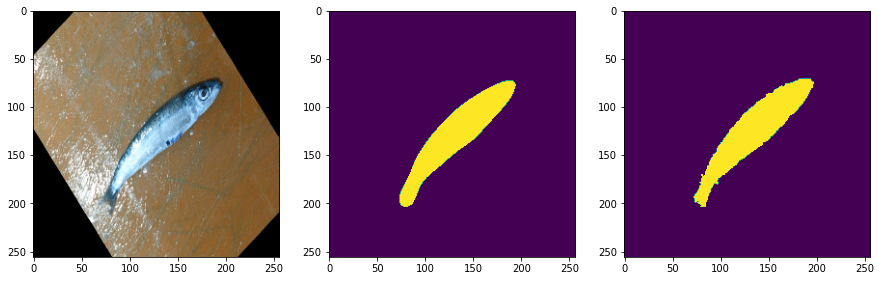

In [27]:
im_id = 0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
axes[0].imshow(x[im_id])
axes[1].imshow(pred[im_id, ..., 0] > 0.5)
axes[2].imshow(y[im_id, ..., 0])
plt.show()

In [28]:
pred_mask=(pred[im_id, ..., 0] > 0.5)*1

In [29]:
mask=(y[im_id, ..., 0])

In [30]:
def IoU(mask, pred_mask):
    iou = np.sum(mask * pred_mask)/np.sum(mask + pred_mask)
    return print(iou)

In [31]:
IoU(mask, pred_mask)

0.4767781018622392


In [32]:
def dice(mask, pred_mask):
    dice=(2*np.sum(mask * pred_mask))/(np.sum(mask) + np.sum(pred_mask))
    return print(dice)

In [33]:
dice(mask, pred_mask)

0.9535562037244784


In [ ]:
def keras_generator_aug(gen_df, batch_size=4):
    while True:
        x_batch = []
        y_batch = []
        
        random_id = np.random.choice(gen_df.shape[0], size=batch_size, replace=False)
        for row_id in random_id:
            img_name, mask_rle = gen_df.iloc[row_id]
            img = cv2.imread('input/train/{}'.format(img_name))
            w, h, _ = img.shape
            mask = rle_decode(mask_rle, shape=(w, h, 1))

            img = cv2.resize(img, (256, 256))
            mask = cv2.resize(mask, (256, 256))
            
            augmentation = strong_aug(p=1.0)
            data = {'image': img.astype('uint8'), 'mask': mask}
            augmented = augmentation(**data)
            crop_img, crop_mask = augmented["image"], augmented["mask"]
            
            x_batch += [crop_img]
            y_batch += [crop_mask]

        x_batch = np.array(x_batch) / 255.  # normalize
        y_batch = np.array(y_batch)

        yield x_batch, np.expand_dims(y_batch, -1)